1. 1960 年代，马文·明斯基（Marvin Minsky）和西摩·佩珀特（Seymour Papert）利用____证明了感知机的局限性，导致神经网络的研究陷入寒冬。   
   A. 梯度消失问题     
   B. 异或问题   
   C. 线性分类问题

答：B。感知机是一个简单的二元线性分类器。异或问题是线性不可分的。？

---

2. 下列关于神经网络的说法正确的是：   
   A. 神经网络的设计仿照生物的神经元，已经可以完成和生物神经一样的功能。   
   B. 神经元只能通过前馈方式连接，否则无法进行反向传播。   
   C. 多层感知机相比于单层感知机有很大提升，其核心在于非线性激活函数。  
   D. 多层感知机没有考虑不同特征之间的关联，因此建模能力不如双线性模型。

答：  
A. 错误。神经网络不完全模拟生物神经系统。只是一种数学模型，不能实现完全一样的功能。  
B. 错误。神经元还可以通过反馈连接（后续层信息回馈到前面层，RNN），混合连接等进行反向传播。  
C. 正确。非线性激活函数使得神经网络能将隐藏层的信息进行非线性变换，来拟合任意复杂的函数。  
D. 错误。多层感知机是一种神经网络结构，能学习特征之间复杂的关联，构建复杂的模型，比双线性厉害多了。

---

3. 为什么（结构固定的）神经网络是参数化模型？它对输入的参数化假设是什么？

答：因为结构固定的神经网络意味着每个层设置的参数和输出的参数都是固定的，这些参数通过训练学习和调整，所有是参数化模型。神经网络对输入的参数化假设是：
- 线性可分离性：输入的数据的特征是可以分离的，能找某个超平面分离这些数据的特征。
- 非线性组合：输入数据的特征之间存在非线性的关系，线性变换不能解释这些特征的关系，需要经过复杂的非线性组合来学习。

---

4. 试计算逻辑斯谛函数、tanh 梯度的取值区间，并根据反向传播的公式思考：当 MLP 的层数比较大时，其梯度计算会有什么影响？

答：
- 逻辑斯谛函数（Logistic Sigmoid Function）：
   $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
   逻辑斯谛函数的导数可以通过链式法则计算：
   $$\frac{d\sigma(x)}{dx} = \sigma(x) \cdot (1 - \sigma(x))$$
   逻辑斯谛函数的取值区间为 (0, 1)，因此其导数的取值范围也在 (0, 0.25)。在反向传播中，逻辑斯谛函数的梯度会逐渐趋于零，可能导致梯度消失问题，尤其在网络较深时会更加明显。

- 双曲正切函数（tanh）：
   $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
   双曲正切函数的导数为：
   $$\frac{d\tanh(x)}{dx} = 1 - \tanh^2(x)$$
   双曲正切函数的取值区间为 (-1, 1)，因此其导数的取值范围在 (0, 1)。与逻辑斯谛函数相比，双曲正切函数的梯度相对更大一些，但仍然存在梯度消失问题。

当 MLP 的层数比较大时，梯度计算可能会受到以下影响：

1. **梯度消失问题**：在反向传播过程中，梯度需要从输出层传播到输入层。由于逻辑斯谛函数和双曲正切函数的导数在某些区域较小，因此在网络较深时，梯度会逐渐减小，甚至消失，导致网络无法有效地更新参数，从而影响模型的收敛性和训练效果。

2. **梯度爆炸问题**：与梯度消失相对应的是梯度爆炸问题，即梯度的绝对值过大，导致参数更新过大，网络不稳定。这可能会导致模型的发散和不稳定的训练过程。

3. **计算效率降低**：随着层数的增加，反向传播需要计算更多的梯度，这会增加计算量和内存消耗，导致训练速度变慢。

为了应对这些问题，可以采取一些方法，如使用更稳定的激活函数（例如ReLU）、使用批量归一化（Batch Normalization）、使用残差连接（Residual Connections）等。这些方法可以帮助缓解梯度消失和梯度爆炸问题，提高网络的训练效果和稳定性。

---

5. 8.3 节中提到，将值域为$(-1,1)$的$\tanh(x)$变形可以使值域拓展到$(a,b)$。对于更一般的情况，推导将区间$[m,n]$均匀映射到$[a,b]$区间的变换$f$。均匀映射可以理解为，对于任意$[u,v] \subset [m,n]$，都有$\frac{v-u}{n-m}=\frac{f(v)-f(u)}{b-a}$。

答：
将区间$[m,n]$均匀映射到$[a,b]$，可以使用线性变换。均匀映射理解为对于任意$[u,v] \subset [m,n]$，都有$\frac{v-u}{n-m}=\frac{f(v)-f(u)}{b-a}$  
定义一个线性函数$f(x)=kx+c$，我们希望:  
- $x=m,f(m)=a,a=km+c$
- $x=n,f(n)=b,b=kn+c$  
可得：$b-a=k(n-m)$，推出$k=\frac{b-a}{n-m}$，$c=a-km=a-\frac{b-a}{n-m}m$  
因此线性变换$$f(x)=\frac{b-a}{n-m}x+a-\frac{b-a}{n-m}m$$  
任意$u,v$带入线性变换：  
$$f(u)=\frac{b-a}{n-m}u+a-\frac{b-a}{n-m}m  \\
f(v)=\frac{b-a}{n-m}v+a-\frac{b-a}{n-m}m  \\
f(u)-f(v)=\frac{b-a}{n-m}(u-v) \\
\frac{v-u}{n-m}=\frac{f(v)-f(u)}{b-a}
$$

---

6. 神经网络训练同样可能产生过拟合现象。尝试修改代码中的损失函数，为多层感知机加入$L_2$正则化约束，其具体形式为所有权重和偏置项的平方和$\sum_{i}(||W_i||_{F}^2+||b||_2^2)$。在 pytorch 中，$L_2$正则化约束通常通过调整优化器的参数`weight_decay`来实现，调整该参数的值并观察结果。

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集
data = np.loadtxt('D:/我的学习/Machine_Learning/动手学机器学习/Hands-on-ML/第8章 神经网络与多层感知机/xor_dataset.csv', delimiter=',')
print('数据集大小：', len(data))
print(data[:5])

# 划分训练集与测试集
ratio = 0.8
split = int(ratio * len(data))
np.random.seed(0)
data = np.random.permutation(data)
# y的维度调整为(len(data), 1)，与后续模型匹配
x_train, y_train = data[:split, :2], data[:split, -1].reshape(-1, 1)
x_test, y_test = data[split:, :2], data[split:, -1].reshape(-1, 1)

数据集大小： 1000
[[ 1.7641  0.4002  0.    ]
 [ 0.9787  2.2409  0.    ]
 [ 1.8676 -0.9773  1.    ]
 [ 0.9501 -0.1514  1.    ]
 [-0.1032  0.4106  1.    ]]


In [30]:
# 基类
class Layer:

    # 前向传播函数，根据输入x计算该层的输出y
    def forward(self, x):
        raise NotImplementedError

    # 反向传播函数，输入上一层回传的梯度grad，输出当前层的梯度
    def backward(self, grad):
        raise NotImplementedError

    # 更新函数，用于更新当前层的参数
    def update(self, learning_rate):
        pass

In [31]:
class Linear(Layer):

    def __init__(self, num_in, num_out, use_bias=True):
        self.num_in = num_in # 输入维度
        self.num_out = num_out # 输出维度
        self.use_bias = use_bias # 是否添加偏置

        # 参数的初始化非常重要
        # 如果把参数默认设置为0，会导致Wx=0，后续计算失去意义
        # 我们直接用正态分布来初始化参数
        self.W = np.random.normal(loc=0, scale=1.0, size=(num_in, num_out))
        if use_bias: # 初始化偏置
            self.b = np.zeros((1, num_out))

    def forward(self, x):
        # 前向传播y = Wx + b
        # x的维度为(batch_size, num_in)
        self.x = x
        self.y = x @ self.W # y的维度为(batch_size, num_out)
        if self.use_bias:
            self.y += self.b
        return self.y

    def backward(self, grad):
        # 反向传播，按照链式法则计算
        # grad的维度为(batch_size, num_out)
        # 梯度要对batch_size取平均
        # grad_W的维度与W相同，为(num_in, num_out)
        self.grad_W = self.x.T @ grad / grad.shape[0]
        if self.use_bias:
            # grad_b的维度与b相同，为(1, num_out)
            self.grad_b = np.mean(grad, axis=0, keepdims=True)
        # 向前传播的grad维度为(batch_size, num_in)
        grad = grad @ self.W.T
        return grad

    def update(self, learning_rate):
        # 更新参数以完成梯度下降
        self.W -= learning_rate * self.grad_W
        if self.use_bias:
            self.b -= learning_rate * self.grad_b

In [32]:
class Identity(Layer):
    # 单位函数

    def forward(self, x):
        return x

    def backward(self, grad):
        return grad


class Sigmoid(Layer):
    # 逻辑斯谛函数

    def forward(self, x):
        self.x = x
        self.y = 1 / (1 + np.exp(-x))
        return self.y

    def backward(self, grad):
        return grad * self.y * (1 - self.y)


class Tanh(Layer):
    # tanh函数

    def forward(self, x):
        self.x = x
        self.y = np.tanh(x)
        return self.y

    def backward(self, grad):
        return grad * (1 - self.y ** 2)


class ReLU(Layer):
    # ReLU函数

    def forward(self, x):
        self.x = x
        self.y = np.maximum(x, 0)
        return self.y

    def backward(self, grad):
        return grad * (self.x >= 0)



# 存储所有激活函数和对应名称，方便索引
activation_dict = {
    'identity': Identity,
    'sigmoid': Sigmoid,
    'tanh': Tanh,
    'relu': ReLU
}

In [33]:
class MLP:

    def __init__(
        self,
        layer_sizes, # 包含每层大小的list
        use_bias=True,
        activation='relu',
        out_activation='identity',
    ):
        self.layers = []
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1: -1]:
            # 添加全连接层
            self.layers.append(Linear(num_in, num_out, use_bias))
            # 添加激活函数
            self.layers.append(activation_dict[activation]())
            num_in = num_out
        # 由于输出需要满足任务的一些要求
        # 例如二分类任务需要输出[0,1]之间的概率值
        # 因此最后一层通常做特殊处理
        self.layers.append(Linear(num_in, layer_sizes[-1], use_bias))
        self.layers.append(activation_dict[out_activation]())


    def forward(self, x):
        # 前向传播，将输入依次通过每一层
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad):
        # 反向传播，grad为损失函数对输出的梯度
        # 将该梯度依次回传，得到每一层参数的梯度
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def update(self, learning_rate):
        # 更新每一层的参数
        for layer in self.layers:
            layer.update(learning_rate)

测试精度： 0.97


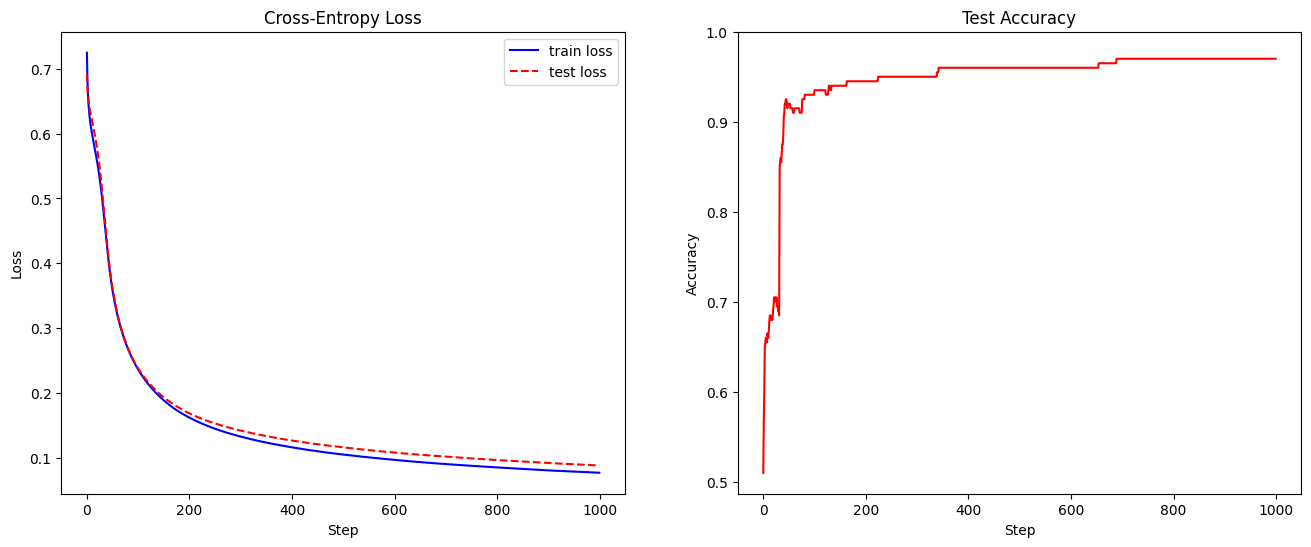

In [34]:
# 设置超参数
num_epochs = 1000
learning_rate = 0.1
batch_size = 128
eps=1e-7 # 用于防止除以0、log(0)等数学问题

l2_reg = 0.001  # 设置正则化系数

# 创建一个层大小依次为[2, 4, 1]的多层感知机
# 对于二分类任务，我们用sigmoid作为输出层的激活函数，使其输出在[0,1]之间
mlp = MLP(layer_sizes=[2, 4, 1], use_bias=True, out_activation='sigmoid')

# 训练过程
losses = []
test_losses = []
test_accs = []
for epoch in range(num_epochs):
    # 我们实现的MLP支持批量输入，因此采用SGD算法
    st = 0
    loss = 0.0
    while True:
        ed = min(st + batch_size, len(x_train))
        if st >= ed:
            break
        # 取出batch
        x = x_train[st: ed]
        y = y_train[st: ed]
        # 计算MLP的预测
        y_pred = mlp.forward(x)
        # 计算梯度∂J/∂y
        grad = (y_pred - y) / (y_pred * (1 - y_pred) + eps)
        # 反向传播
        mlp.backward(grad)
        # 更新参数
        mlp.update(learning_rate)
        # 计算交叉熵损失
        train_loss = np.sum(-y * np.log(y_pred + eps) \
            - (1 - y) * np.log(1 - y_pred + eps))
        
        # 添加L2正则化项
        l2_loss = 0.0
        for layer in mlp.layers:
            if isinstance(layer, Linear):
                l2_loss += np.sum(layer.W ** 2)  # 权重的平方和
                if layer.use_bias:
                    l2_loss += np.sum(layer.b ** 2)  # 偏置的平方和
        
        # 总损失为交叉熵损失加上正则化项
        total_loss = train_loss + l2_reg * l2_loss
        loss += total_loss
        st += batch_size

    losses.append(loss / len(x_train))
    # 计算测试集上的交叉熵和精度
    y_pred = mlp.forward(x_test)
    test_loss = np.sum(-y_test * np.log(y_pred + eps) \
        - (1 - y_test) * np.log(1 - y_pred + eps)) / len(x_test)
    test_acc = np.sum(np.round(y_pred) == y_test) / len(x_test)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

print('测试精度：', test_accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, color='blue', label='train loss')
plt.plot(test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)
plt.plot(test_accs, color='red')
plt.ylim(top=1.0)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

In [35]:
import torch # PyTorch库
import torch.nn as nn # PyTorch中与神经网络相关的工具
from torch.nn.init import normal_ # 正态分布初始化

torch_activation_dict = {
    'identity': lambda x: x,
    'sigmoid': torch.sigmoid,
    'tanh': torch.tanh,
    'relu': torch.relu
}

# 定义MLP类，基于PyTorch的自定义模块通常都继承nn.Module
# 继承后，只需要实现forward函数，进行前向传播
# 反向传播与梯度计算均由PyTorch自动完成
class MLP_torch(nn.Module):

    def __init__(
        self,
        layer_sizes, # 包含每层大小的list
        use_bias=True,
        activation='relu',
        out_activation='identity'
    ):
        super().__init__() # 初始化父类
        self.activation = torch_activation_dict[activation]
        self.out_activation = torch_activation_dict[out_activation]
        self.layers = nn.ModuleList() # ModuleList以列表方式存储PyTorch模块
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1:]:
            # 创建全连接层
            self.layers.append(nn.Linear(num_in, num_out, bias=use_bias))
            # 正态分布初始化，采用与前面手动实现时相同的方式
            normal_(self.layers[-1].weight, std=1.0)
            # 偏置项为全0
            self.layers[-1].bias.data.fill_(0.0)
            num_in = num_out

    def forward(self, x):
        # 前向传播
        # PyTorch可以自行处理batch_size等维度问题
        # 我们只需要让输入依次通过每一层即可
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.activation(x)
        # 输出层
        x = self.layers[-1](x)
        x = self.out_activation(x)
        return x

测试精度： 0.96


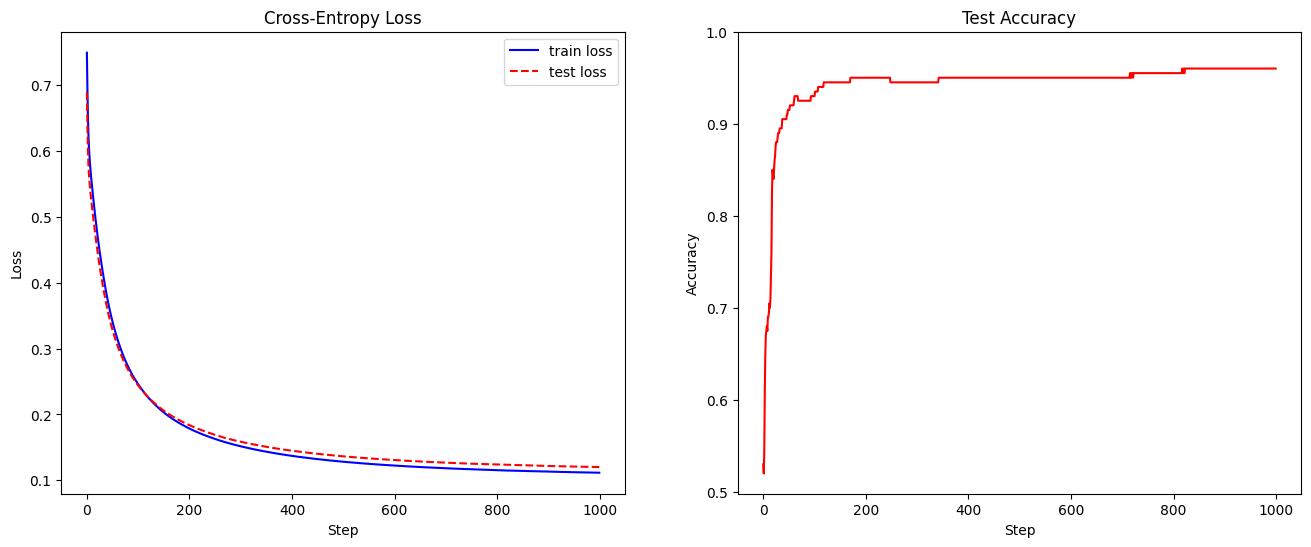

In [36]:
# 设置超参数
num_epochs = 1000
learning_rate = 0.1
batch_size = 128
eps = 1e-7
torch.manual_seed(0)

# 初始化MLP模型
mlp = MLP_torch(layer_sizes=[2, 4, 1], use_bias=True,
    out_activation='sigmoid')

# 定义SGD优化器
opt = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=0.001)

# 训练过程
losses = []
test_losses = []
test_accs = []
for epoch in range(num_epochs):
    st = 0
    loss = []
    while True:
        ed = min(st + batch_size, len(x_train))
        if st >= ed:
            break
        # 取出batch，转为张量
        x = torch.tensor(x_train[st: ed],
            dtype=torch.float32)
        y = torch.tensor(y_train[st: ed],
            dtype=torch.float32).reshape(-1, 1)
        # 计算MLP的预测
        # 调用模型时，PyTorch会自动调用模型的forward方法
        # y_pred的维度为(batch_size, layer_sizes[-1])
        y_pred = mlp(x)
        # 计算交叉熵损失
        train_loss = torch.mean(-y * torch.log(y_pred + eps) \
            - (1 - y) * torch.log(1 - y_pred + eps))
        # 清空梯度
        opt.zero_grad()
        # 反向传播
        train_loss.backward()
        # 更新参数
        opt.step()

        # 记录累加损失，需要先将损失从张量转为numpy格式
        loss.append(train_loss.detach().numpy())
        st += batch_size

    losses.append(np.mean(loss))
    # 计算测试集上的交叉熵
    # 在不需要梯度的部分，可以用torch.inference_mode()加速计算
    with torch.inference_mode():
        x = torch.tensor(x_test, dtype=torch.float32)
        y = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
        y_pred = mlp(x)
        test_loss = torch.sum(-y * torch.log(y_pred + eps) \
            - (1 - y) * torch.log(1 - y_pred + eps)) / len(x_test)
        test_acc = torch.sum(torch.round(y_pred) == y) / len(x_test)
        test_losses.append(test_loss.detach().numpy())
        test_accs.append(test_acc.detach().numpy())

print('测试精度：', test_accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, color='blue', label='train loss')
plt.plot(test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)
plt.plot(test_accs, color='red')
plt.ylim(top=1.0)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

- 在传统代码中，首先求得多层感知机的权重和偏置，然后设置正则化系数，通过添加到损失函数后面计算总损失实现正则化。
  ```python
    # 计算交叉熵损失
    train_loss = np.sum(-y * np.log(y_pred + eps) \
        - (1 - y) * np.log(1 - y_pred + eps))

    # 添加L2正则化项
    l2_loss = 0.0
    for layer in mlp.layers:
        if isinstance(layer, Linear):
            l2_loss += np.sum(layer.W ** 2)  # 权重的平方和
            if layer.use_bias:
                l2_loss += np.sum(layer.b ** 2)  # 偏置的平方和

    # 总损失为交叉熵损失加上正则化项
    total_loss = train_loss + l2_reg * l2_loss
    loss += total_loss
    st += batch_size
  ```

- 在pytorch中，设置`weight_decay`参数来添加正则化。参数值越大正则化越强。这个参数就是在梯度下降优化过程中对模型的权重进行影响。$\lambda$就是weightdecay $$w_{new} = w_{old} - \alpha \left( \frac{\partial L}{\partial w} + \lambda w_{old} \right)$$


